<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

In [3]:
df_dados = pd.read_csv('dados/HousePrices_HalfMil.csv', sep=';')

## Visualizar os dados

In [4]:
df_dados

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
...,...,...,...,...,...,...,...
995,29150,48,1,5,4,0,0
996,43550,112,2,2,3,0,1
997,56575,185,3,4,4,0,1
998,56075,185,2,3,1,0,1


## Verificando o tamanho do dataset

In [5]:
df_dados.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [6]:
df_dados.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


## Matriz de correlação

In [7]:
df_dados.corr().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.00,0.12,0.10,0.12,0.11,0.43,0.63
area,0.12,1.00,-0.01,-0.01,0.01,-0.02,-0.02
garagem,0.10,-0.01,1.00,0.07,0.06,-0.02,-0.02
banheiros,0.12,-0.01,0.07,1.00,0.05,-0.03,-0.02
lareira,0.11,0.01,0.06,0.05,1.00,0.03,-0.00
marmore,0.43,-0.02,-0.02,-0.03,0.03,1.00,-0.01
andares,0.63,-0.02,-0.02,-0.02,-0.00,-0.01,1.00


<i>Percebe-se que existe uma forte correlação, positiva, entre o preço do imóvel e seu número de andares, e também entre o preço e a existência de acabamento em mármore.</i>

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Configurando o estilo e cor dos gráficos

In [8]:
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

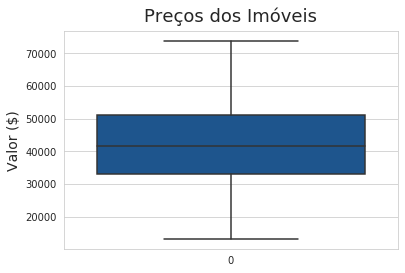

In [9]:
ax = sns.boxplot(data=df_dados['precos'], orient='v')
ax.set_title('Preços dos Imóveis', fontsize=18, pad=10)
ax.set_ylabel('Valor ($)', fontsize=14)
ax

<i>Analisando o box plot, se vê que a mediana está entre, aproximadamente, 41 mil; e que 50% dos imóveis possuem o valor na faixa entre 33 mil à 51 mil. Também não possuem valores discrepantes, seja para cima ou para baixo.</i>

## Investigando a variável *dependente* (y) juntamente com outras características

### Box-plot (Preço X Garagem)

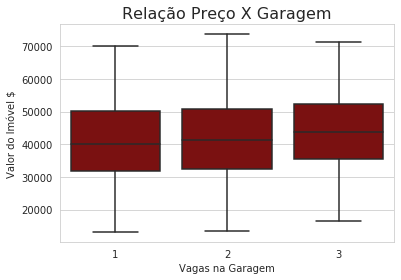

In [10]:
ax_garagem = sns.boxplot(y='precos', x='garagem', data=df_dados, color='darkred')
ax_garagem.set_title('Relação Preço X Garagem', fontsize=16)
ax_garagem.set_ylabel('Valor do Imóvel $')
ax_garagem.set_xlabel('Vagas na Garagem')
ax_garagem

<i>Observa-se que os imóveis que possuem garagem com 3 vagas possuem um valor um pouco mais elevado, enquanto imóveis com 2 e 1 vagas possuem uma diferença mínima, no preço, de um para o outro.</i>

### Box-plot (Preço X Banheiros)

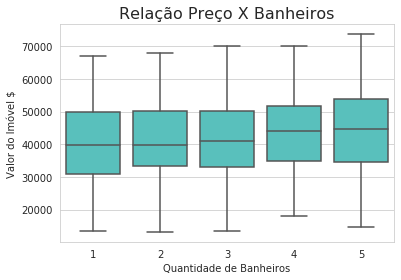

In [11]:
ax_banheiros = sns.boxplot(y='precos', x='banheiros', data=df_dados, color='mediumturquoise')
ax_banheiros.set_title('Relação Preço X Banheiros', fontsize=16)
ax_banheiros.set_ylabel('Valor do Imóvel $')
ax_banheiros.set_xlabel('Quantidade de Banheiros')
ax_banheiros

<i>Observa-se que imóveis que têm até 3 banheiros possuem a mediana, em relação ao preço, muito próximas. Enquanto imóveis com 4 e 5 banheiros apresentam um maior aumento nos valores.</i>

### Box-plot (Preço X Lareira)

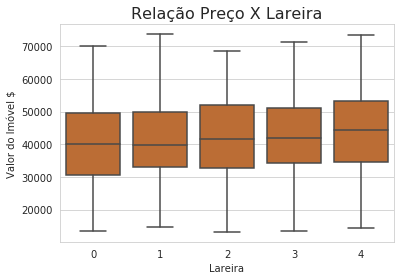

In [12]:
ax_lareira = sns.boxplot(y='precos', x='lareira', data=df_dados, color='chocolate')
ax_lareira.set_title('Relação Preço X Lareira', fontsize=16)
ax_lareira.set_ylabel('Valor do Imóvel $')
ax_lareira.set_xlabel('Lareira')
ax_lareira

<i>Imóveis com 0 ou 1 lareira possuem a mediana quase igual, refletindo nos preços também muito próximos, apenas se percebendo valores um pouco mais baixos para imóveis com 0 lareiras. A partir de 2 ou mais lareiras, se vê um pequeno aumento gradual no preço dos imóveis, com a mediana oscilando muito pouco de um para outro.<i/>

### Box-plot (Preço X Acabamento em Mármore)

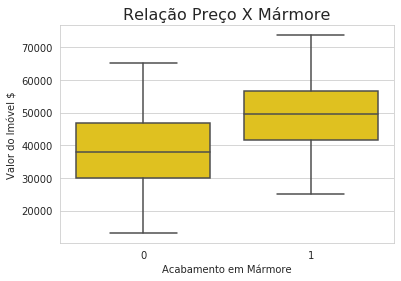

In [13]:
ax_marmore = sns.boxplot(y='precos', x='marmore', data=df_dados, color='gold')
ax_marmore.set_title('Relação Preço X Mármore', fontsize=16)
ax_marmore.set_ylabel('Valor do Imóvel $')
ax_marmore.set_xlabel('Acabamento em Mármore')
ax_marmore

<i>Se tratando de uma variável binária, os imóveis que possuem acabamento em mármore têm valores substancialmente maiores em relação os imóveis que não possuem esse acabamento, mostrando uma forte correlação entre o acabamento em Mármore e o Preço do imóvel<i/>

### Box-plot (Preço X Andares)

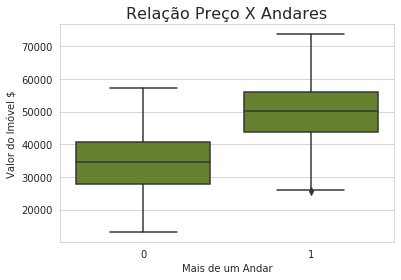

In [14]:
ax_andares = sns.boxplot(y='precos', x='andares', data=df_dados, color='olivedrab')
ax_andares.set_title('Relação Preço X Andares', fontsize=16)
ax_andares.set_ylabel('Valor do Imóvel $')
ax_andares.set_xlabel('Mais de um Andar')
ax_andares

<i>Observa-se um resultado similar ao da relação entre preço e acabamento em mármore. Neste caso, imóveis que possuem apenas um andar possuem valores muito menores quando comparados à imóveis que possuem mais de um, mostrando outra forte correlação entre o preço do imóvel e o fator de ele possuir mais de um andar ou não.<i/>

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

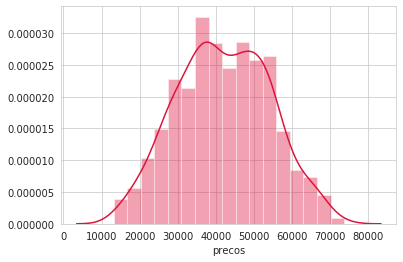

In [15]:
ax = sns.distplot(df_dados['precos'], color='crimson')

<i>Esse gráfico não possui uma distribuição no padrão, pois seu pico não fica tão ao centro, causando uma curva de tendência mais alargada, porém ainda é aceitável e válido.<i/>

## Gráficos de dispersão entre as variáveis do dataset

### Plotando o pairplot fixando somente uma variável no eixo y

In [16]:
df_dados

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
...,...,...,...,...,...,...,...
995,29150,48,1,5,4,0,0
996,43550,112,2,2,3,0,1
997,56575,185,3,4,4,0,1
998,56075,185,2,3,1,0,1


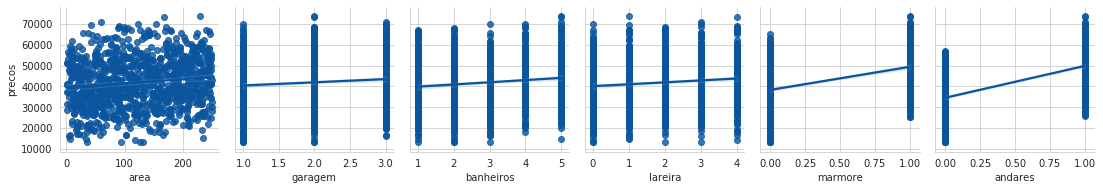

In [17]:
ax = sns.pairplot(df_dados, 
                  y_vars='precos', 
                  x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'],
                  kind='reg'
                 )

<i>Observa-se que a dispersão da variável area preenche todo o gráfico, pois, diferente das outras variáveis, que possuem valores específicos (0, 1, 2...), os imóveis possuem areas dos mais variados tamanhos.
Como já havia sido percebido, as variáveis area, garagem, banheiros e lareira possuem uma reta de regressão mais suave, mostrando que elas têm uma baixa correlação com o preço do imóvel, já que o aumento dessas variáveis não possui um grande impacto no valor do mesmo. Em contrapartida, a reta de regressão das variáveis marmore e andares têm uma maior inclinação, demonstrando que a presença, ou não, dessas variáveis influenciam mais fortemente no preço do imóvel (alta correlação positiva).<i/>

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [18]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [19]:
y = df_dados['precos']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [20]:
X = df_dados[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]
X

,area,garagem,banheiros,lareira,marmore,andares
0,25,3,4,3,0,1
1,35,1,3,1,0,0
2,195,2,4,2,0,0
3,33,2,2,1,0,1
4,11,2,3,0,0,1
...,...,...,...,...,...,...
995,48,1,5,4,0,0
996,112,2,2,3,0,1
997,185,3,4,4,0,1
998,185,2,3,1,0,1


## Criando os datasets de treino e de teste

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
#70% para treino
X_train.shape

(700, 6)

In [23]:
#30% para teste
y_train.shape[0]

700

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [25]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)


In [26]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

In [27]:
r2 = modelo.score(X_train, y_train).round(2)
r2

0.66

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

In [28]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

In [29]:
coef = metrics.r2_score(y_test, y_previsto).round(2)
print('R² = {}'.format(coef))

R² = 0.62


## Análises gráficas da previsão do modelo

### Obtendo o Resíduo (erros)

In [30]:
y_previsto_treino = modelo.predict(X_train)

In [31]:
residuo = y_train - y_previsto_treino

### Gráfico de dispersão entre o valor estimado e resíduos

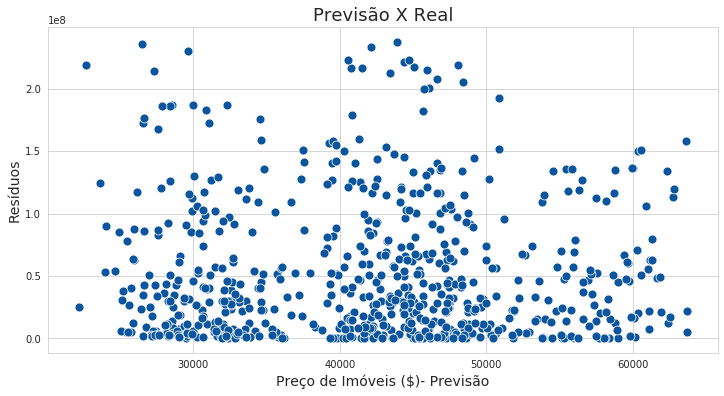

In [32]:
ax = sns.scatterplot(x = y_previsto_treino, y = residuo**2, s=80) 
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Preço de Imóveis ($)- Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

<i>Neste gráfico, que inclui os resíduos, percebe-se que a variação não é constante, pois os resíduos estão dispersos por todo o gráfico<i/>

## Criando um simulador interativo

In [33]:
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

#Criando o formulário
area = widgets.Text(description='Área (m²)')
garagem = widgets.Text(description='Garagem')
banheiros = widgets.Text(description='Banheiros')
lareira = widgets.Text(description='Lareira')
marmore = widgets.Text(description='Mármore')
andares = widgets.Text(description='Andares')

botao = widgets.Button(description='Simulação de preço')

#Posição dos inputs
left = VBox([area, banheiros, marmore])
right = VBox([garagem, lareira, andares])
inputs = HBox([left, right])

#Função de simulação
def simulador(data):
    entrada = [[
                float(area.value if area.value else 0),
                float(garagem.value if garagem.value else 0),
                float(banheiros.value if banheiros.value else 0),
                float(lareira.value if lareira.value else 0),
                float(marmore.value if marmore.value else 0),
                float(andares.value if andares.value else 0),
            ]]
    print('Valor previsto do Imóvel: {0:.2f}$'.format(modelo.predict(entrada)[0])) 
    
#Acionar função
botao.on_click(simulador)

In [34]:
display(inputs, botao)

Button(description='Simulação de preço', style=ButtonStyle())